## Question 4

### (a)

We can write the LQR problem as a quadratic formulation, as
<br>
$\mathcal{L} (x, \lambda, \mu) = -\sum_{i=1}^{n} \alpha_i \log{\left( \beta_i + x_i \right)} + \lambda^\top (1^\top {x} - c)  - \mu^\top {x} $
<br>
where $\lambda \in \mathbb{R}^n$ and $\mu_i \geq 0$.

Therefore, by applying the sufficient conditions of optimality for constrained convex optimization problems, the optimal solution is given, as
<br>
$ 
U_i '
={\alpha_i\over{x_i^* + \beta_i}} = \lambda^* - \mu_i^*
$ 
<br>
From the above equation, the marginal utilities $U_i '$ are given as the Lagrangian multipliers $\lambda$, $\mu_i$.
<br>
Also, the optimal network rates are given as,
<br>
$x_i^* = 
\begin{cases}
{\alpha_i\over{\lambda^*}} - \beta_i & \mu_i^* = 0\\
0 & \mu_i^* \neq 0
\end{cases}
$
<br>
(More details of the process of computing the optimiality, refer the lecture note.)

The optimal actions of the problem can be computed as the below CVXPY script.

In [3]:
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pylab as plt

np.set_printoptions(precision=3)
matplotlib.rcParams.update({'font.size': 14})


def network_utility(n, a, b, sum_x=10):

    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a
    beta = cp.Parameter(n, nonneg=True)
    beta.value = b

    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(alpha @ cp.log(beta + x)))

    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - sum_x == 0]

    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

Problem status: optimal
Optimal utility = 25.67 
Traffic rates:
[2.061e-07 5.000e+00 1.244e-07 1.500e+00 3.500e+00]
Marginal utilities:
[0.5   0.667 0.4   0.667 0.667]


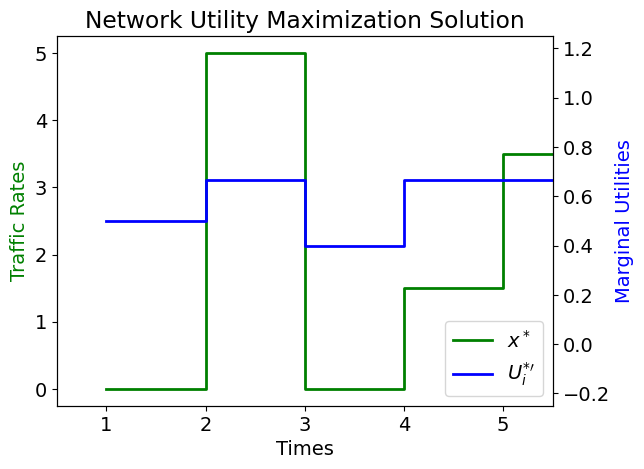

In [4]:
# Solve Q4 (a)
buckets = 5
alpha = np.array([1.0, 4.0, 2.0, 3.0, 5.0])
beta = np.array([2.0, 1.0, 5.0, 3.0, 4.0])
c = 10

stat, value, x = network_utility(buckets, alpha, beta, c)
u = alpha * np.log(beta + x)
u_dot = alpha/(beta + x)
print('Problem status: {}'.format(stat))
print('Optimal utility = {:.4g} '.format(value))
print('Traffic rates:\n{}'.format(x))
print('Marginal utilities:\n{}'.format(u_dot))

X = x.copy()
U = u.copy()
U_DOT = u_dot.copy()

# to include the last data point as a step, we need to repeat it
A = np.concatenate((alpha,[alpha[-1]]))
B = np.concatenate((beta,[beta[-1]]))
X = np.concatenate((X,[X[-1]]))
U = np.concatenate((U, [U[-1]]))
U_DOT = np.concatenate((U_DOT,[U_DOT[-1]]))
T = np.arange(0.5,buckets+1.5,1)+0.5

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
line_X, = ax1.step(T, X,where='post',label =r'$x^*$',lw=2, color='g')
line_U_DOT, = ax2.step(T, U_DOT,where='post',label=r'$U_i^{*\prime}$',lw=2, color='b')

ax1.set_xlabel('Times')
ax1.set_xlim(0.5,buckets+0.5)

ax1.set_ylim(-0.25,5.25)
ax2.set_ylim(-0.25 ,1.25)

ax1.set_ylabel('Traffic Rates', color='g')
ax2.set_ylabel('Marginal Utilities', color='b')

plt.legend(handles=[line_X, line_U_DOT], loc='lower right')
plt.title('Network Utility Maximization Solution')
plt.show()

### (b)

The sensitivity of the optimal objective value to the capacity is larger at $c=10$. The computed sensitivity is presented below.

In [5]:
# Solve Q4 (a)
buckets = 5
alpha = np.array([1.0, 4.0, 2.0, 3.0, 5.0])
beta = np.array([2.0, 1.0, 5.0, 3.0, 4.0])

_, value_9, _ = network_utility(buckets, alpha, beta, 9)
# _, value_10, _ = network_utility(buckets, alpha, beta, 10)
_, value_11, _ = network_utility(buckets, alpha, beta, 11)

_, value_99, _ = network_utility(buckets, alpha, beta, 99)
# _, value_100, _ = network_utility(buckets, alpha, beta, 100)
_, value_101, _ = network_utility(buckets, alpha, beta, 101)

print('Sensitivity of optimal utility per unit at capacity 10 = {:.4g} '.format(
        0.5 * (value_11 - value_9)
        ))
print('Sensitivity of optimal utility per unit at capacity 100 = {:.4g} '.format(
        0.5 * (value_101 - value_99)
        ))


Sensitivity of optimal utility per unit at capacity 10 = 0.6674 
Sensitivity of optimal utility per unit at capacity 100 = 0.1304 
